# Softmax

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Funciones

# Funciones de Softmax Regression

## Softmax

$$ \phi_{softmax}(z^{i}) = \frac{\exp^{z^{(i)}}}{\sum^{k}_{j=0} \exp^{z^{(i)}_{k}} } $$

## Costo

$$J(W) = \frac{1}{n}\sum^{n}_{i=0} H(T_i ,O_i)$$

## Cross entropy

$$ H(T_i ,O_i) = - \sum_m T_i * log(O_i)$$

## Gradiente

$$\nabla{w_{j}} J(W) = - \frac{1}{n} \sum^{n}_{i=0} [x^{(i)}(T_i  - O_i)] $$


In [85]:
def predict(x, w):
    return (np.dot(x,w))

In [86]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

In [87]:
def label_predictions(vect_inputs):
    return vect_inputs.argmax(axis=1)

In [88]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

In [89]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

In [90]:
def optimizar(x_train, smax, y_enc):
    return - np.dot(x_train.T, (y_enc - smax))

In [91]:
iris = datasets.load_iris()

In [92]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)

In [93]:
for i in range(x.shape[1]):
    mean = x[:,i].mean()
    deviation =  x[:,i].std()
    x[:,i] = (x[:,i] - mean) / deviation

# Implementacion del modelo

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [95]:
x_train = np.c_[np.ones((len(x_train),1)), x_train]
x_test = np.c_[np.ones((len(x_test),1)), x_test]

In [96]:
x_train.shape[1]

5

In [97]:
y_enc = (np.arange(np.max(y_train.flatten()) + 1) == y_train.flatten()[:, None]).astype(float)

y_enc[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [98]:
x_train.shape

(112, 5)

In [99]:
np.concatenate((theta_set,theta_ver,theta_vir)).reshape(x_train.shape[1],3)


array([[0.76040993, 0.63361036, 0.06256861],
       [0.92772137, 0.35217367, 0.99142484],
       [0.37828761, 0.41584922, 0.88800392],
       [0.72811891, 0.55272897, 0.0422396 ],
       [0.22508167, 0.98584594, 0.10452839]])

In [100]:
theta_set = np.random.rand(1,x_train.shape[1])
theta_ver = np.random.rand(1,x_train.shape[1])    
theta_vir = np.random.rand(1,x_train.shape[1])
theta_all = np.concatenate((theta_set,theta_ver,theta_vir)).reshape(x_train.shape[1],3)


eta = 0.001
max_iter = 20000
cost_smax = []
for i in range(0, max_iter):
    vector_pos_train = predict(x_train, theta_all)
    
    smax = softmax(vector_pos_train)
    theta_all =  theta_all - eta*(optimizar(x_train, smax, y_enc))
    J_cost = cost(smax, y_enc)
    cost_smax.append(J_cost)

theta_all

array([[ 0.17565933,  6.41251747, -4.50102444],
       [-2.21714726,  2.68931966,  1.00671642],
       [ 2.80819861, -0.30728258, -1.72776658],
       [-4.45460626, -1.84381206,  8.29128196],
       [-4.24001092, -1.17207141,  6.11521545]])

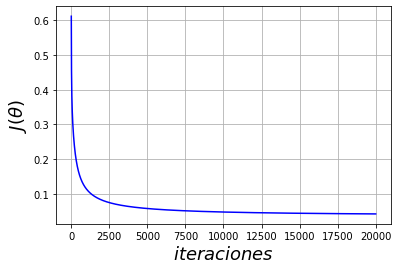

In [101]:
plt.plot(np.arange(max_iter), cost_smax, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [102]:
vector_pos_test = predict(x_test, theta_all)
    
smax_pred = softmax(vector_pos_test)

y_pred = label_predictions(smax_pred)

y_pred

array([1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1], dtype=int64)

In [103]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

In [104]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.9736842105263158

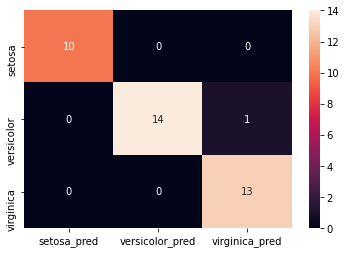

In [105]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [106]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [107]:
print(classification_report(y_test,  y_pred, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.93      0.97        15
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

